<a href="https://colab.research.google.com/github/sipocz/Garbage_Classification/blob/main/_81_percent_Garbage_Classification_Convolutional_Autoencoder_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!rm -r sample_data/

In [3]:
fnames={
        'cardboard':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip',
        'glass':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/glass.zip',
        'metal':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/metal.zip',
        'paper':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/paper.zip',
        'plastic':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/plastic.zip',
        'trash':'https://github.com/sipocz/Garbage_Classification/raw/zip/trash.zip'
}


In [4]:
rm *.zip

rm: cannot remove '*.zip': No such file or directory


In [5]:
def create_dir(fnames):
    for key in fnames:
        !mkdir graf
        dirname="./graf/"+key
        !mkdir $dirname
        allfile=dirname+"/*"
        !rm $allfile
        fname_url_tmp=fnames[key]
        fname=key+".zip"
        !wget $fname_url_tmp
        !cp $fname $dirname 
        
        !rm $fname
        zipname=dirname+"/"+key+".zip"
        print("dirname:",dirname)
        !unzip $zipname -d "./graf"
        #!rm $zipname  

In [6]:
!unzip --help

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [7]:
fnames["trash"]

'https://github.com/sipocz/Garbage_Classification/raw/zip/trash.zip'

In [8]:
!cd metal

/bin/bash: line 0: cd: metal: No such file or directory


In [9]:
create_dir(fnames)

rm: cannot remove './graf/cardboard/*': No such file or directory
--2021-10-31 22:32:50--  https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip [following]
--2021-10-31 22:32:50--  https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6093838 (5.8M) [application/zip]
Saving to: ‘cardboard.zip’

cardb

In [10]:
def format_image(image_dir):
    image = tf.read_file(image_dir)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize_image_with_pad(image, 256, 256, align_corners=True)
    return image

In [11]:
imagedir="./graf"
img_width,img_height=512,384
batch_size=5

In [12]:
import pandas as pd


In [13]:
train_path='./graf'

In [14]:
test_path='./graf'

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
#paths to the train, validation and test image datasets 
train_path = './graf'
valid_path = './graf'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=1, subset='validation')


Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.


In [17]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [18]:
import os
print(os.listdir('./graf'))

['trash', 'glass', 'plastic', 'cardboard', 'metal', 'paper']


In [19]:
data_path = './graf'

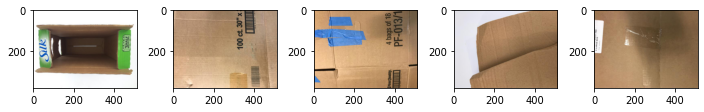

In [20]:
plot_imgs(data_path+'/cardboard')

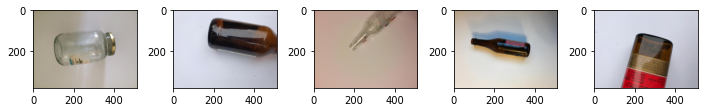

In [21]:
plot_imgs(data_path+'/glass')

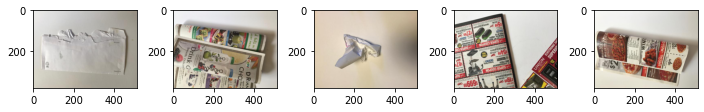

In [22]:
plot_imgs(data_path+'/paper')

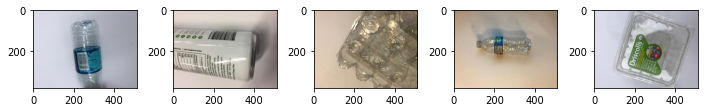

In [23]:
plot_imgs(data_path+'/plastic')

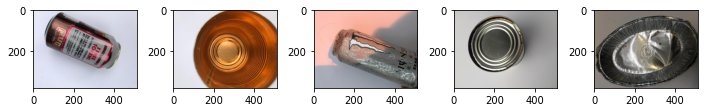

In [24]:
plot_imgs(data_path+'/metal')

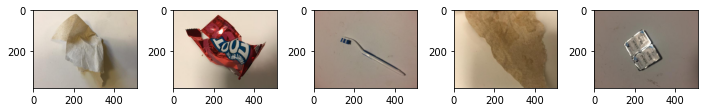

In [25]:
plot_imgs(data_path+'/trash')

In [26]:
batch_size = 1

In [27]:
x_pxm=256
y_pxm=192
divider=1
bpc=3

In [28]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.05,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)


x_px=int(x_pxm/divider)
y_px=int(y_pxm/divider)

print(f"X: {x_px}, Y: {y_px}")
train_generator=train.flow_from_directory(data_path,target_size=(x_px,y_px),batch_size=batch_size,class_mode='sparse',subset='training',color_mode="rgb")
test_generator=test.flow_from_directory(data_path,target_size=(x_px,y_px),batch_size=batch_size,class_mode='sparse',subset='validation',color_mode="rgb")

X: 256, Y: 192
Found 1903 images belonging to 6 classes.
Found 197 images belonging to 6 classes.


In [29]:
train_generator.class_mode


'sparse'

In [30]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [31]:
num_classes = 6

In [32]:
!rm *h5

rm: cannot remove '*h5': No such file or directory


In [33]:
# Build Model
# Importáld a megfelelő rétegeket
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv2D, Dropout,Convolution2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, Rescaling,RandomFlip,RandomRotation, Reshape,BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta,Adam,SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
from tensorflow.keras import backend as K
from keras.regularizers import l1
from keras.initializers import RandomNormal,Zeros,GlorotUniform
K.clear_session()


inputs= Input(shape=(x_px,y_px,bpc))
e = Conv2D(32, (2, 2), activation='relu')(inputs)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)



l = Flatten()(e)
#l = Dense(1920, activation='sigmoid')(l)

l = Dense(54, activation='sigmoid')(l)


decoded = Dense(6, activation='softmax')(l)


autoencoder = Model(inputs, decoded)






In [34]:
model_path="garbage_2_cnn.h5"

#checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')



In [35]:
paths="./graf"
XSize=256
YSize=192

In [36]:
 keras_ds = tf.keras.preprocessing.image_dataset_from_directory(paths, batch_size=1, image_size=(XSize, YSize),label_mode=None)

Found 2001 files belonging to 1 classes.


In [37]:
keras_ds

<BatchDataset shapes: (None, 256, 192, 3), types: tf.float32>

In [38]:
num_epochs = 5
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [39]:
from keras.models import load_model
#model=load_model(modelfname)

In [40]:
def scheduler(epoch, lr):
  return 0.01



In [41]:
LR_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [42]:
#callbacks_list = [checkpoint1,LR_callback]

In [43]:
print(f"{12.34234234:.4f}")

12.3423


In [44]:
cce = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()
optimizer=Adam()
autoencoder.compile(loss=cce, optimizer=optimizer, metrics=[cce,acc])
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 192, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 255, 191, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 95, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 93, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 22, 64)        0     

In [45]:
from keras.callbacks import ModelCheckpoint
from datetime  import datetime

times=datetime.now().strftime("%Y%m%d_%H%M%S")
print(f'{datetime.now().strftime("%Y%m%d_%H%M%S")}')
best_model = ModelCheckpoint(filepath='Model_-{val_loss:.4f}.h5', monitor='val_loss', mode='min',verbose=1, save_best_only=True, save_freq="epoch")


20211031_223314


In [46]:
!rm *.h5

rm: cannot remove '*.h5': No such file or directory


In [122]:

# Train Model
from IPython.display import clear_output

for i in range(5):
    ratex={0:0.000005,1:0.000001,2:0.000005,3:0.000001,4:0.000005}
    epocsd={0:4,1:4,2:10,3:10,4:10}
    batchsd={0:1,1:1,2:1,3:1,4:1}
    clear_output(wait=True)
    print("-"*15)
    print(f"num: {i:4}, Learning Rate: {ratex[i]:9} epocs: {epocsd[i]:6}")
    print("-"*15)
    optimizer=Adam(ratex[i])
    
  
    autoencoder.summary()
    autoencoder.compile(loss=cce, optimizer=optimizer, metrics=[cce,acc])
    history = autoencoder.fit(train_generator, epochs=epocsd[i],  validation_data=test_generator,batch_size=batchsd[i],callbacks=[best_model])

---------------
num:    4, Learning Rate:     5e-06 epocs:     10
---------------
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 192, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 255, 191, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 95, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 93, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 44, 64)        36928     
_____________________________________________

In [120]:
autoencoder.save("Conv_Color_Autoenc_0_7600.h5")

In [121]:
---
from IPython.display import clear_output

for i in range(5):
    ratex={0:0.000005,1:0.000001,2:0.000005,3:0.000005,4:0.000005}
    clear_output(wait=True)
    print("*"*15)
    print(f"Learning Rate: {ratex[i]}")
    print("*"*15)
    optimizer=Adam(ratex[i])
    autoencoder.compile(loss='MSE', optimizer=optimizer, metrics=['MSE'])
    autoencoder.summary()
    history = autoencoder.fit(train_generator, epochs=10, validation_data=test_generator,batch_size=7)

SyntaxError: ignored

In [ ]:
#-----------------------------

In [ ]:
pik=train_generator.next()

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

In [ ]:
labels[pik[1][0]]

In [ ]:
pik0=pik[0]*256
pik1=pik[1]*256

In [ ]:

from google.colab.patches import cv2_imshow
cv2_imshow(pik0[0],)

In [ ]:
pik1

In [ ]:
o1=autoencoder.predict(pik[0])

In [ ]:
o1

In [ ]:
o1.max()

In [ ]:
labels[o1.tolist()[0].index(o1.max())]

In [ ]:
---

In [ ]:
# test adatok

In [ ]:

furl="https://github.com/sipocz/Garbage_Classification/raw/5b9dbccfb0e0942b62f5ca172c2be09825679912/TEST.zip"
!rm TEST.zip 
!wget $furl
fname=furl.split("/")[-1]

!unzip $fname
!rm TEST.zip

In [123]:
x_pxm=256
y_pxm=192
divider=1
bpc=3

In [124]:
data_dir="./TEST"

testing_ds = tf.keras.utils.image_dataset_from_directory(
  
  data_dir,
  labels=None,
  shuffle=False,
  validation_split=0.0,
  
  seed=123,
  color_mode="rgb",
  image_size=(x_pxm, y_pxm),
  batch_size=1, 
  label_mode=None)


Found 300 files belonging to 1 classes.


In [125]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [126]:
normalized_ds = testing_ds.map(lambda x: (normalization_layer(x)))

In [127]:
normalized_ds

<MapDataset shapes: (None, 256, 192, 3), types: tf.float32>

In [128]:
wname="./Model_-0.3651.h5"

In [129]:
autoencoder.load_weights(wname)

In [130]:
o1=autoencoder.predict(normalized_ds)

In [131]:
o1

array([[1.5332651e-05, 3.2148301e-04, 8.1792728e-05, 1.1652129e-04,
        9.9942172e-01, 4.3136286e-05],
       [1.1086536e-03, 1.1624148e-03, 9.3205386e-01, 9.7107913e-05,
        3.5674073e-02, 2.9903909e-02],
       [4.2362080e-04, 6.2511074e-03, 1.8443914e-04, 9.9146241e-01,
        1.5877336e-03, 9.0549409e-05],
       ...,
       [5.3909393e-03, 3.9436914e-02, 8.9263237e-01, 1.3369623e-03,
        3.0520003e-02, 3.0682817e-02],
       [1.9734323e-03, 3.6373946e-01, 6.2688315e-01, 1.2351826e-04,
        7.1433494e-03, 1.3699556e-04],
       [1.4728680e-01, 9.0315323e-03, 1.0355226e-02, 4.4412133e-01,
        1.4898132e-02, 3.7430704e-01]], dtype=float32)

In [132]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [133]:
def code_to_category(o):
    label=labels[o.tolist().index(o.max())]
    return(label)

In [134]:
o1[0].tolist().index(o1[0].max())

4

In [135]:
cats=[code_to_category(oi) for oi in o1] 

In [136]:
file1=testing_ds.file_paths

In [137]:
df=pd.DataFrame()

In [138]:
fname=[f1.split("/")[-1] for f1 in file1]

In [139]:
df["Filename"]=fname
df["Labels"]=cats

In [140]:
df.head(42)

,Filename,Labels
0,000.jpg,plastic
1,001.jpg,metal
2,002.jpg,paper
3,003.jpg,metal
4,004.jpg,cardboard
5,005.jpg,cardboard
6,006.jpg,cardboard
7,007.jpg,cardboard
8,008.jpg,glass
9,009.jpg,paper


In [141]:
from datetime  import datetime
csv_filename="Submission_"+datetime.now().strftime("%Y%m%d_%H%M%S")+".csv"
print(csv_filename)
df.to_csv(csv_filename,index=False)

Submission_20211101_010429.csv


In [142]:
----

SyntaxError: ignored

In [ ]:
for i in 

In [ ]:
plt.imshow(pik0[0].astype("uint8"))

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')


In [ ]:
def imgshow():
    import matplotlib.pyplot as plt
    batch = train_generator.take(1)
    plotData = batch[0]
    plotData = plotData.reshape(28, 28)
    plt.gray() # use this line if you don't want to see it in color
    plt.imshow(plotData)
    plt.show()

In [ ]:
imgshow()

In [ ]:
data_dir="./TEST"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, label_mode=None)

In [ ]:
type(train_ds)
t1=train_ds.as_numpy_iterator()

In [ ]:
t1.next()

In [ ]:
batch=train_ds.take(1)

plt.imshow(batch(1))

In [ ]:
batch

In [ ]:
batch

In [ ]:
list(train_ds.take(1))
plt.imshow(train_ds.take(1))

In [ ]:
list(train_ds.take(1))

In [ ]:
---

In [ ]:
from datetime  import datetime
a=datetime.now().strftime("%Y%m%d_%H%M%S")
print(a)
20211016_165045
prediction_df.to_csv("submission_"+a+".csv")
predcsv=test_df.loc[:,["text","predicted"]]

predcsv.to_csv("mini.csv")